In [42]:
from sklearn.linear_model import Lasso
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from matplotlib import pyplot
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
 
register_matplotlib_converters()
%matplotlib inline
sns.set_style('whitegrid')

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
from keras.optimizers import Adam
from keras.preprocessing.sequence import TimeseriesGenerator
from keras import regularizers

def add_hours_dam(df, start_hour, interval=48):
    for i in range(start_hour, start_hour+interval):
        start = str(i)
        df["DAM LMP_PRC_"+start+"_hours_ago"] = 0.0
    for i in range(len(df)-1, interval-1, -1):
        for j in range(start_hour, start_hour+interval):
            start = str(j)
            v = df['DAM LMP_PRC'].iloc[i-j,] 
            df.at[i, "DAM LMP_PRC_"+start+"_hours_ago"] =  v
    return df


def add_hours_rtm(df, start_hour, interval=48):
    for rtm in range(1, 13):
        for i in range(start_hour, start_hour+interval):
            start = str(i)
            df["RTM_"+str(rtm) +"_LMP_PRC_"+start+"_hours_ago"] = 0.0
        for i in range(len(df)-1, interval-1, -1):
            for j in range(start_hour, start_hour+interval):
                start = str(j)
                v = df[('RTM LMP_PRC', rtm)].iloc[i-j,] 
                df.at[i, "RTM_"+str(rtm) +"_LMP_PRC_"+start+"_hours_ago"] =  v
    return df

def add_hours_gap(df, start_hour, interval=48):
    for i in range(start_hour, start_hour+interval):
        start = str(i)
        df["GAP LMP_PRC_"+start+"_hours_ago"] = 0.0
    for i in range(len(df)-1, interval-1, -1):
        for j in range(start_hour, start_hour+interval):
            start = str(j)
            v = df['Gap'].iloc[i-j,] 
            df.at[i, "GAP LMP_PRC_"+start+"_hours_ago"] =  v
    return df

Using TensorFlow backend.


In [43]:
feature_names = ['DAM LMP_PRC_1_hours_ago',
 'RTM_9_LMP_PRC_25_hours_ago',
 'RTM_9_LMP_PRC_23_hours_ago',
 'RTM_2_LMP_PRC_24_hours_ago',
 'DAM LMP_PRC_10_hours_ago',
 'RTM_2_LMP_PRC_33_hours_ago',
 'RTM_8_LMP_PRC_54_hours_ago',
 'RTM_12_LMP_PRC_38_hours_ago',
 'RTM_10_LMP_PRC_59_hours_ago',
 'RTM_1_LMP_PRC_24_hours_ago',
 'RTM_7_LMP_PRC_54_hours_ago',
 'relative_humidity_set_1',
 'RTM_12_LMP_PRC_37_hours_ago',
 'DAM LMP_PRC_24_hours_ago',
 'RTM_3_LMP_PRC_59_hours_ago',
 'RTM_3_LMP_PRC_24_hours_ago',
 'RTM_10_LMP_PRC_50_hours_ago',
 'RTM_10_LMP_PRC_27_hours_ago',
 'Demand_Forecast_Day_Ahead',
 'RTM_11_LMP_PRC_21_hours_ago',
 'RTM_4_LMP_PRC_20_hours_ago',
 'RTM_11_LMP_PRC_38_hours_ago',
 'RTM_11_LMP_PRC_14_hours_ago',
 'RTM_3_LMP_PRC_54_hours_ago',
 'RTM_12_LMP_PRC_49_hours_ago',
 'RTM_10_LMP_PRC_38_hours_ago',
 'RTM_9_LMP_PRC_57_hours_ago',
 ('RT_Forecast_RTD', 3),
 'RTM_6_LMP_PRC_55_hours_ago',
 'RTM_2_LMP_PRC_15_hours_ago',
 'DAM LMP_PRC_3_hours_ago',
 'RTM_7_LMP_PRC_45_hours_ago',
 ('RT_Forecast_RTD', 11),
 'RTM_3_LMP_PRC_25_hours_ago',
 'RTM_12_LMP_PRC_54_hours_ago',
 'sea_level_pressure_set_1d',
 ('RT_Forecast_RTD', 1),
 'RTM_2_LMP_PRC_43_hours_ago',
 'RTM_4_LMP_PRC_25_hours_ago',
 'DAM LMP_PRC_47_hours_ago',
 'RTM_11_LMP_PRC_23_hours_ago',
 'RTM_12_LMP_PRC_16_hours_ago',
 'RTM_1_LMP_PRC_33_hours_ago',
 'RTM_6_LMP_PRC_14_hours_ago',
 'DAM LMP_PRC_14_hours_ago',
 'DAM LMP_PRC_48_hours_ago',
 'Temperature',
 'RTM_9_LMP_PRC_17_hours_ago',
 'DAM LMP_PRC_23_hours_ago',
 'Relative Humidity',
 ('RT_Forecast_RTD', 10),
 'windspeed',
 'RTM_9_LMP_PRC_39_hours_ago',
 'RTM_12_LMP_PRC_25_hours_ago',
 'ceiling_set_1',
 'RTM_1_LMP_PRC_43_hours_ago',
 'RTM_4_LMP_PRC_46_hours_ago',
 'DAM LMP_PRC_9_hours_ago',
 'Day',
 'RTM_5_LMP_PRC_24_hours_ago',
 'RTM_7_LMP_PRC_36_hours_ago',
 'RTM_10_LMP_PRC_42_hours_ago',
 'RTM_4_LMP_PRC_24_hours_ago',
 'RTM_5_LMP_PRC_14_hours_ago',
 'RTM_5_LMP_PRC_45_hours_ago',
 'RTM_6_LMP_PRC_13_hours_ago',
 'RTM_7_LMP_PRC_56_hours_ago',
 'RTM_6_LMP_PRC_24_hours_ago',
 'RTM_12_LMP_PRC_57_hours_ago',
 'RTM_3_LMP_PRC_19_hours_ago',
 'RTM_2_LMP_PRC_23_hours_ago',
 'DAM LMP_PRC_4_hours_ago',
 'RTM_1_LMP_PRC_25_hours_ago',
 'RTM_2_LMP_PRC_34_hours_ago',
 'RTM_1_LMP_PRC_46_hours_ago',
 'RTM_12_LMP_PRC_47_hours_ago',
 'RTM_4_LMP_PRC_18_hours_ago',
 ('RT_Forecast_RTD', 12),
 'RTM_3_LMP_PRC_14_hours_ago',
 'dewpoint',
 'DAM LMP_PRC_2_hours_ago',
 ('RT_Forecast_RTD', 7),
 'RTM_7_LMP_PRC_57_hours_ago',
 'Solar Zenith Angle',
 'RTM_7_LMP_PRC_34_hours_ago',
 'RTM_11_LMP_PRC_29_hours_ago',
 'RTM_12_LMP_PRC_46_hours_ago',
 'RTM_4_LMP_PRC_42_hours_ago',
 'DAM LMP_PRC_6_hours_ago',
 'RTM_12_LMP_PRC_45_hours_ago',
 'RTM_3_LMP_PRC_21_hours_ago',
 'RTM_1_LMP_PRC_58_hours_ago',
 'DAM LMP_PRC_8_hours_ago',
 'RTM_5_LMP_PRC_32_hours_ago',
 'RTM_5_LMP_PRC_13_hours_ago',
 ('DAM RT_Forecast_RTPD', 3),
 'RTM_9_LMP_PRC_26_hours_ago',
 'humidity',
 'RTM_11_LMP_PRC_48_hours_ago',
 'cloud_layer_1_code_set_1',
 'RTM_2_LMP_PRC_46_hours_ago',
 'RTM_9_LMP_PRC_54_hours_ago',
 'DAM LMP_PRC_17_hours_ago',
 'RTM_10_LMP_PRC_14_hours_ago',
 'RTM_1_LMP_PRC_26_hours_ago',
 'RTM_6_LMP_PRC_17_hours_ago',
 'RTM_6_LMP_PRC_25_hours_ago',
 'RTM_7_LMP_PRC_29_hours_ago',
 'RTM_9_LMP_PRC_53_hours_ago',
 'RTM_1_LMP_PRC_12_hours_ago',
 'RTM_7_LMP_PRC_51_hours_ago',
 'RTM_2_LMP_PRC_54_hours_ago',
 'RTM_12_LMP_PRC_44_hours_ago',
 'RTM_12_LMP_PRC_26_hours_ago',
 'pressure',
 'RTM_4_LMP_PRC_27_hours_ago',
 'RTM_8_LMP_PRC_17_hours_ago',
 'RTM_5_LMP_PRC_33_hours_ago',
 'RTM_1_LMP_PRC_44_hours_ago',
 'DAM LMP_PRC_22_hours_ago',
 'RTM_10_LMP_PRC_23_hours_ago',
 'RTM_3_LMP_PRC_42_hours_ago',
 'RTM_12_LMP_PRC_14_hours_ago',
 'DAM LMP_PRC_46_hours_ago',
 ('RT_Forecast_RTD', 2),
 'RTM_11_LMP_PRC_39_hours_ago',
 'DAM LMP_PRC_44_hours_ago',
 'RTM_7_LMP_PRC_27_hours_ago',
 'RTM_1_LMP_PRC_47_hours_ago',
 'DAM LMP_PRC_7_hours_ago',
 'RTM_7_LMP_PRC_23_hours_ago',
 'RTM_7_LMP_PRC_38_hours_ago',
 'RTM_11_LMP_PRC_13_hours_ago',
 'Demand_Forecast_2Day_Ahead',
 'RTM_7_LMP_PRC_53_hours_ago',
 'RTM_12_LMP_PRC_39_hours_ago',
 'RTM_10_LMP_PRC_39_hours_ago',
 'RTM_12_LMP_PRC_34_hours_ago',
 'RTM_7_LMP_PRC_13_hours_ago',
 'RTM_1_LMP_PRC_22_hours_ago',
 'RTM_10_LMP_PRC_17_hours_ago',
 'RTM_5_LMP_PRC_21_hours_ago',
 'RTM_1_LMP_PRC_50_hours_ago',
 'RTM_9_LMP_PRC_38_hours_ago',
 'RTM_7_LMP_PRC_46_hours_ago',
 'RTM_11_LMP_PRC_16_hours_ago',
 'RTM_3_LMP_PRC_32_hours_ago',
 ('RT_Forecast_RTD', 9),
 'RTM_1_LMP_PRC_53_hours_ago',
 ('DAM RT_Forecast_RTPD', 1),
 'DAM LMP_PRC_5_hours_ago',
 'RTM_3_LMP_PRC_12_hours_ago',
 'RTM_9_LMP_PRC_44_hours_ago',
 'RTM_3_LMP_PRC_52_hours_ago',
 'DAM LMP_PRC_25_hours_ago',
 'RTM_8_LMP_PRC_26_hours_ago',
 'RTM_1_LMP_PRC_41_hours_ago',
 'RTM_9_LMP_PRC_47_hours_ago',
 'RTM_5_LMP_PRC_42_hours_ago',
 'RTM_7_LMP_PRC_24_hours_ago',
 'RTM_6_LMP_PRC_52_hours_ago',
 ('RT_Forecast_RTD', 4),
 'DAM LMP_PRC_45_hours_ago',
 'RTM_11_LMP_PRC_25_hours_ago',
 'RTM_8_LMP_PRC_37_hours_ago',
 'DAM LMP_PRC_16_hours_ago',
 'wind_gust_set_1',
 'RTM_2_LMP_PRC_59_hours_ago',
 'RTM_4_LMP_PRC_49_hours_ago',
 'RTM_11_LMP_PRC_15_hours_ago',
 'RTM_12_LMP_PRC_22_hours_ago',
 'Month',
 'RTM_8_LMP_PRC_45_hours_ago',
 'RTM_9_LMP_PRC_36_hours_ago',
 'DAM LMP_PRC_30_hours_ago',
 'RTM_11_LMP_PRC_37_hours_ago',
 'RTM_8_LMP_PRC_36_hours_ago',
 'RTM_12_LMP_PRC_13_hours_ago',
 'DAM LMP_PRC_39_hours_ago',
 'RTM_12_LMP_PRC_29_hours_ago',
 'RTM_1_LMP_PRC_17_hours_ago',
 'Precipitable Water',
 'RTM_5_LMP_PRC_46_hours_ago',
 'RTM_7_LMP_PRC_52_hours_ago',
 'RTM_7_LMP_PRC_33_hours_ago',
 'RTM_7_LMP_PRC_47_hours_ago',
 'RTM_10_LMP_PRC_36_hours_ago',
 'RTM_8_LMP_PRC_14_hours_ago',
 'RTM_3_LMP_PRC_48_hours_ago',
 'RTM_1_LMP_PRC_23_hours_ago',
 'RTM_2_LMP_PRC_21_hours_ago',
 'Wind Direction',
 'RTM_3_LMP_PRC_20_hours_ago',
 'RTM_1_LMP_PRC_51_hours_ago',
 'RTM_6_LMP_PRC_22_hours_ago',
 'DAM LMP_PRC_19_hours_ago',
 'RTM_1_LMP_PRC_21_hours_ago',
 ('RT_Forecast_RTD', 8),
 'RTM_11_LMP_PRC_42_hours_ago',
 'RTM_4_LMP_PRC_51_hours_ago',
 'RTM_2_LMP_PRC_13_hours_ago',
 'RTM_4_LMP_PRC_59_hours_ago',
 'RTM_7_LMP_PRC_12_hours_ago',
 ('RT_Forecast_RTD', 5),
 'RTM_11_LMP_PRC_55_hours_ago',
 'RTM_6_LMP_PRC_32_hours_ago',
 'RTM_8_LMP_PRC_48_hours_ago',
 'RTM_4_LMP_PRC_13_hours_ago',
 'RTM_2_LMP_PRC_12_hours_ago',
 'RTM_9_LMP_PRC_49_hours_ago',
 'RTM_10_LMP_PRC_25_hours_ago',
 'RTM_7_LMP_PRC_17_hours_ago',
 'RTM_12_LMP_PRC_48_hours_ago',
 'RTM_5_LMP_PRC_26_hours_ago',
 'DAM LMP_PRC_11_hours_ago',
 'RTM_1_LMP_PRC_16_hours_ago',
 'RTM_4_LMP_PRC_53_hours_ago',
 'RTM_8_LMP_PRC_53_hours_ago',
 'RTM_9_LMP_PRC_55_hours_ago',
 'RTM_7_LMP_PRC_42_hours_ago',
 'RTM_3_LMP_PRC_30_hours_ago',
 'RTM_1_LMP_PRC_54_hours_ago',
 'RTM_3_LMP_PRC_56_hours_ago',
 'RTM_3_LMP_PRC_38_hours_ago',
 'RTM_4_LMP_PRC_39_hours_ago',
 'RTM_6_LMP_PRC_16_hours_ago',
 'RTM_9_LMP_PRC_51_hours_ago',
 'RTM_7_LMP_PRC_26_hours_ago',
 'Demand_Forecast_7Day_Ahead',
 'RTM_2_LMP_PRC_35_hours_ago',
 'RTM_10_LMP_PRC_29_hours_ago',
 'RTM_6_LMP_PRC_48_hours_ago',
 'RTM_4_LMP_PRC_21_hours_ago',
 'RTM_1_LMP_PRC_55_hours_ago',
 'RTM_1_LMP_PRC_34_hours_ago',
 'RTM_12_LMP_PRC_30_hours_ago',
 'RTM_10_LMP_PRC_24_hours_ago',
 'RTM_10_LMP_PRC_28_hours_ago',
 'RTM_5_LMP_PRC_53_hours_ago',
 'RTM_9_LMP_PRC_29_hours_ago',
 'RTM_6_LMP_PRC_26_hours_ago',
 'RTM_2_LMP_PRC_47_hours_ago',
 'RTM_4_LMP_PRC_56_hours_ago',
 'RTM_6_LMP_PRC_12_hours_ago',
 'RTM_11_LMP_PRC_27_hours_ago',
 'RTM_6_LMP_PRC_20_hours_ago',
 'RTM_8_LMP_PRC_13_hours_ago',
 'RTM_3_LMP_PRC_45_hours_ago',
 'RTM_12_LMP_PRC_51_hours_ago',
 'RTM_12_LMP_PRC_19_hours_ago',
 'RTM_6_LMP_PRC_27_hours_ago',
 'RTM_6_LMP_PRC_29_hours_ago',
 'RTM_2_LMP_PRC_40_hours_ago',
 'RTM_5_LMP_PRC_38_hours_ago',
 'RTM_2_LMP_PRC_22_hours_ago',
 'RTM_9_LMP_PRC_30_hours_ago',
 'RTM_3_LMP_PRC_16_hours_ago',
 'RTM_5_LMP_PRC_22_hours_ago',
 'RTM_5_LMP_PRC_48_hours_ago',
 'RTM_1_LMP_PRC_20_hours_ago',
 'RTM_4_LMP_PRC_36_hours_ago',
 'RTM_5_LMP_PRC_52_hours_ago',
 'cloud_layer_3_code_set_1',
 'DAM LMP_PRC_34_hours_ago',
 'RTM_1_LMP_PRC_36_hours_ago',
 'RTM_8_LMP_PRC_29_hours_ago',
 'Fill Flag',
 'RTM_2_LMP_PRC_48_hours_ago',
 'RTM_10_LMP_PRC_15_hours_ago',
 'RTM_11_LMP_PRC_54_hours_ago',
 'RTM_12_LMP_PRC_52_hours_ago',
 'RTM_6_LMP_PRC_44_hours_ago',
 'RTM_11_LMP_PRC_57_hours_ago',
 'RTM_11_LMP_PRC_24_hours_ago',
 'RTM_1_LMP_PRC_48_hours_ago',
 'RTM_3_LMP_PRC_44_hours_ago',
 'RTM_12_LMP_PRC_15_hours_ago',
 'RTM_12_LMP_PRC_55_hours_ago',
 'RTM_2_LMP_PRC_56_hours_ago',
 'RTM_2_LMP_PRC_38_hours_ago',
 'RTM_2_LMP_PRC_53_hours_ago',
 'altimeter_set_1',
 'RTM_11_LMP_PRC_17_hours_ago',
 'RTM_5_LMP_PRC_16_hours_ago',
 'RTM_5_LMP_PRC_40_hours_ago',
 'RTM_1_LMP_PRC_40_hours_ago',
 'RTM_8_LMP_PRC_56_hours_ago',
 'DAM LMP_PRC_37_hours_ago',
 'RTM_12_LMP_PRC_53_hours_ago',
 'RTM_6_LMP_PRC_57_hours_ago',
 'RTM_7_LMP_PRC_25_hours_ago',
 'RTM_1_LMP_PRC_37_hours_ago',
 'RTM_10_LMP_PRC_13_hours_ago',
 'RTM_9_LMP_PRC_20_hours_ago',
 'GHI',
 'RTM_3_LMP_PRC_46_hours_ago',
 'RTM_10_LMP_PRC_46_hours_ago',
 'RTM_12_LMP_PRC_23_hours_ago',
 'RTM_7_LMP_PRC_41_hours_ago',
 'RTM_1_LMP_PRC_57_hours_ago',
 'RTM_6_LMP_PRC_45_hours_ago',
 'RTM_6_LMP_PRC_47_hours_ago',
 'RTM_2_LMP_PRC_42_hours_ago',
 'RTM_4_LMP_PRC_57_hours_ago',
 'RTM_4_LMP_PRC_35_hours_ago',
 'RTM_8_LMP_PRC_24_hours_ago',
 'RTM_12_LMP_PRC_21_hours_ago',
 'RTM_6_LMP_PRC_33_hours_ago',
 'RTM_6_LMP_PRC_21_hours_ago',
 'RTM_5_LMP_PRC_56_hours_ago',
 'RTM_7_LMP_PRC_48_hours_ago',
 'DAM LMP_PRC_40_hours_ago',
 'RTM_7_LMP_PRC_39_hours_ago',
 'RTM_3_LMP_PRC_26_hours_ago',
 'RTM_8_LMP_PRC_27_hours_ago',
 'RTM_10_LMP_PRC_41_hours_ago',
 'RTM_9_LMP_PRC_56_hours_ago',
 'Cloud Type',
 'Clearsky GHI',
 'RTM_3_LMP_PRC_23_hours_ago',
 'RTM_10_LMP_PRC_35_hours_ago',
 'RTM_2_LMP_PRC_18_hours_ago',
 'RTM_2_LMP_PRC_28_hours_ago',
 'RTM_7_LMP_PRC_21_hours_ago',
 'RTM_7_LMP_PRC_44_hours_ago',
 'RTM_2_LMP_PRC_51_hours_ago',
 'RTM_2_LMP_PRC_30_hours_ago',
 'RTM_7_LMP_PRC_49_hours_ago',
 'RTM_3_LMP_PRC_51_hours_ago',
 'RTM_4_LMP_PRC_14_hours_ago',
 'RTM_5_LMP_PRC_20_hours_ago',
 'RTM_5_LMP_PRC_17_hours_ago',
 'RTM_6_LMP_PRC_28_hours_ago',
 'RTM_9_LMP_PRC_52_hours_ago',
 'RTM_11_LMP_PRC_52_hours_ago',
 'RTM_7_LMP_PRC_15_hours_ago',
 'RTM_8_LMP_PRC_57_hours_ago',
 'RTM_6_LMP_PRC_18_hours_ago',
 'RTM_8_LMP_PRC_20_hours_ago',
 'RTM_9_LMP_PRC_13_hours_ago',
 'RTM_10_LMP_PRC_44_hours_ago',
 'DAM LMP_PRC_15_hours_ago',
 'RTM_9_LMP_PRC_21_hours_ago',
 'DAM LMP_PRC_26_hours_ago',
 'RTM_6_LMP_PRC_53_hours_ago',
 'RTM_1_LMP_PRC_38_hours_ago',
 'RTM_9_LMP_PRC_42_hours_ago',
 'RTM_11_LMP_PRC_26_hours_ago',
 'DAM LMP_PRC_29_hours_ago',
 'RTM_11_LMP_PRC_35_hours_ago',
 'RTM_4_LMP_PRC_17_hours_ago',
 'RTM_6_LMP_PRC_35_hours_ago',
 'RTM_1_LMP_PRC_19_hours_ago',
 'RTM_10_LMP_PRC_16_hours_ago',
 'RTM_1_LMP_PRC_49_hours_ago',
 'RTM_7_LMP_PRC_16_hours_ago',
 'RTM_6_LMP_PRC_19_hours_ago',
 'RTM_12_LMP_PRC_28_hours_ago',
 'RTM_10_LMP_PRC_57_hours_ago',
 'RTM_4_LMP_PRC_16_hours_ago',
 'RTM_5_LMP_PRC_18_hours_ago',
 'RTM_11_LMP_PRC_30_hours_ago',
 'RTM_4_LMP_PRC_30_hours_ago',
 'RTM_9_LMP_PRC_33_hours_ago',
 'RTM_2_LMP_PRC_19_hours_ago',
 'RTM_10_LMP_PRC_52_hours_ago',
 'RTM_7_LMP_PRC_58_hours_ago',
 'RTM_8_LMP_PRC_41_hours_ago',
 'RTM_3_LMP_PRC_35_hours_ago',
 'RTM_9_LMP_PRC_22_hours_ago',
 'RTM_2_LMP_PRC_45_hours_ago',
 'RTM_3_LMP_PRC_47_hours_ago',
 'heat_index_set_1d',
 'RTM_4_LMP_PRC_33_hours_ago',
 'RTM_9_LMP_PRC_15_hours_ago',
 'RTM_10_LMP_PRC_53_hours_ago',
 'RTM_11_LMP_PRC_28_hours_ago',
 'RTM_5_LMP_PRC_59_hours_ago',
 'RTM_4_LMP_PRC_26_hours_ago',
 'Clearsky DHI',
 'RTM_11_LMP_PRC_31_hours_ago',
 'RTM_10_LMP_PRC_55_hours_ago',
 'RTM_12_LMP_PRC_56_hours_ago',
 'DAM LMP_PRC_18_hours_ago',
 'RTM_6_LMP_PRC_38_hours_ago',
 'RTM_1_LMP_PRC_56_hours_ago',
 'RTM_2_LMP_PRC_58_hours_ago',
 'RTM_2_LMP_PRC_20_hours_ago',
 'RTM_5_LMP_PRC_27_hours_ago',
 'RTM_10_LMP_PRC_22_hours_ago',
 'RTM_11_LMP_PRC_50_hours_ago',
 'RTM_5_LMP_PRC_36_hours_ago',
 'RTM_7_LMP_PRC_22_hours_ago',
 'RTM_8_LMP_PRC_18_hours_ago',
 'DHI',
 'RTM_6_LMP_PRC_56_hours_ago',
 'DAM LMP_PRC_27_hours_ago',
 'RTM_11_LMP_PRC_22_hours_ago',
 'RTM_3_LMP_PRC_27_hours_ago',
 'RTM_10_LMP_PRC_48_hours_ago',
 'RTM_6_LMP_PRC_59_hours_ago',
 'RTM_8_LMP_PRC_49_hours_ago',
 'weather_condition_set_1d',
 'RTM_8_LMP_PRC_42_hours_ago',
 'RTM_1_LMP_PRC_45_hours_ago',
 'RTM_1_LMP_PRC_29_hours_ago',
 'RTM_5_LMP_PRC_41_hours_ago',
 'RTM_9_LMP_PRC_41_hours_ago',
 'RTM_6_LMP_PRC_39_hours_ago',
 'RTM_1_LMP_PRC_18_hours_ago',
 'RTM_11_LMP_PRC_19_hours_ago',
 'RTM_9_LMP_PRC_46_hours_ago',
 'DAM LMP_PRC_38_hours_ago',
 'RTM_9_LMP_PRC_37_hours_ago',
 'RTM_8_LMP_PRC_23_hours_ago',
 'RTM_5_LMP_PRC_58_hours_ago',
 'RTM_2_LMP_PRC_52_hours_ago',
 'RTM_10_LMP_PRC_56_hours_ago',
 'RTM_8_LMP_PRC_39_hours_ago',
 'RTM_11_LMP_PRC_44_hours_ago',
 'RTM_2_LMP_PRC_17_hours_ago',
 'RTM_1_LMP_PRC_13_hours_ago',
 'RTM_3_LMP_PRC_29_hours_ago',
 'RTM_4_LMP_PRC_19_hours_ago',
 'RTM_1_LMP_PRC_15_hours_ago',
 'RTM_8_LMP_PRC_52_hours_ago',
 'RTM_9_LMP_PRC_50_hours_ago',
 'RTM_11_LMP_PRC_47_hours_ago',
 'RTM_4_LMP_PRC_45_hours_ago',
 'RTM_2_LMP_PRC_32_hours_ago',
 'RTM_11_LMP_PRC_20_hours_ago',
 'RTM_10_LMP_PRC_34_hours_ago',
 'RTM_11_LMP_PRC_59_hours_ago',
 'RTM_4_LMP_PRC_52_hours_ago',
 'RTM_8_LMP_PRC_58_hours_ago',
 'RTM_9_LMP_PRC_31_hours_ago',
 'DAM LMP_PRC_42_hours_ago',
 'RTM_7_LMP_PRC_50_hours_ago',
 'RTM_6_LMP_PRC_23_hours_ago',
 'RTM_12_LMP_PRC_17_hours_ago',
 'RTM_2_LMP_PRC_44_hours_ago',
 'Clearsky DNI',
 'RTM_6_LMP_PRC_37_hours_ago',
 'DAM LMP_PRC_41_hours_ago',
 'RTM_5_LMP_PRC_39_hours_ago',
 'RTM_7_LMP_PRC_35_hours_ago',
 'DAM LMP_PRC_12_hours_ago',
 'RTM_3_LMP_PRC_49_hours_ago',
 'RTM_4_LMP_PRC_22_hours_ago',
 'RTM_4_LMP_PRC_43_hours_ago',
 'RTM_9_LMP_PRC_27_hours_ago',
 'RTM_2_LMP_PRC_25_hours_ago',
 'RTM_12_LMP_PRC_50_hours_ago',
 'RTM_5_LMP_PRC_23_hours_ago',
 'RTM_4_LMP_PRC_48_hours_ago',
 'RTM_12_LMP_PRC_59_hours_ago',
 'RTM_3_LMP_PRC_17_hours_ago',
 'DAM LMP_PRC_13_hours_ago',
 'RTM_4_LMP_PRC_38_hours_ago',
 'DAM LMP_PRC_35_hours_ago',
 'RTM_9_LMP_PRC_19_hours_ago',
 'RTM_12_LMP_PRC_20_hours_ago',
 'RTM_10_LMP_PRC_45_hours_ago',
 'RTM_12_LMP_PRC_40_hours_ago',
 'RTM_2_LMP_PRC_49_hours_ago',
 'RTM_2_LMP_PRC_39_hours_ago',
 'RTM_5_LMP_PRC_54_hours_ago',
 'RTM_8_LMP_PRC_12_hours_ago',
 'RTM_2_LMP_PRC_14_hours_ago',
 'RTM_10_LMP_PRC_43_hours_ago',
 'RTM_3_LMP_PRC_55_hours_ago',
 'RTM_6_LMP_PRC_46_hours_ago',
 'RTM_9_LMP_PRC_59_hours_ago',
 'RTM_7_LMP_PRC_28_hours_ago',
 ('RT_Forecast_RTD', 6),
 'RTM_4_LMP_PRC_55_hours_ago',
 'RTM_11_LMP_PRC_46_hours_ago',
 'DAM LMP_PRC_43_hours_ago',
 'RTM_9_LMP_PRC_43_hours_ago',
 'RTM_9_LMP_PRC_18_hours_ago',
 'RTM_4_LMP_PRC_28_hours_ago',
 'cloud_layer_2_code_set_1',
 'RTM_4_LMP_PRC_15_hours_ago',
 'RTM_6_LMP_PRC_41_hours_ago',
 'RTM_3_LMP_PRC_43_hours_ago',
 'RTM_2_LMP_PRC_27_hours_ago',
 'RTM_7_LMP_PRC_32_hours_ago',
 'RTM_5_LMP_PRC_47_hours_ago',
 'RTM_3_LMP_PRC_57_hours_ago',
 'RTM_10_LMP_PRC_54_hours_ago',
 'RTM_3_LMP_PRC_33_hours_ago',
 'RTM_9_LMP_PRC_24_hours_ago',
 'RTM_9_LMP_PRC_45_hours_ago',
 'RTM_10_LMP_PRC_30_hours_ago',
 'RTM_9_LMP_PRC_12_hours_ago',
 'RTM_8_LMP_PRC_38_hours_ago',
 'RTM_3_LMP_PRC_22_hours_ago',
 'RTM_11_LMP_PRC_56_hours_ago',
 'DAM LMP_PRC_28_hours_ago',
 'RTM_8_LMP_PRC_34_hours_ago',
 'RTM_9_LMP_PRC_28_hours_ago',
 'RTM_11_LMP_PRC_43_hours_ago',
 'RTM_6_LMP_PRC_30_hours_ago',
 'RTM_10_LMP_PRC_32_hours_ago',
 'RTM_12_LMP_PRC_58_hours_ago',
 'RTM_1_LMP_PRC_32_hours_ago',
 'RTM_12_LMP_PRC_12_hours_ago',
 'DAM LMP_PRC_36_hours_ago',
 'RTM_8_LMP_PRC_55_hours_ago',
 'RTM_8_LMP_PRC_59_hours_ago',
 'RTM_8_LMP_PRC_31_hours_ago',
 'RTM_1_LMP_PRC_14_hours_ago',
 'RTM_2_LMP_PRC_57_hours_ago',
 'RTM_8_LMP_PRC_35_hours_ago',
 'RTM_12_LMP_PRC_27_hours_ago',
 ('DAM RT_Forecast_RTPD', 2),
 'DAM LMP_PRC_20_hours_ago',
 'RTM_3_LMP_PRC_13_hours_ago',
 'RTM_3_LMP_PRC_28_hours_ago',
 'RTM_5_LMP_PRC_57_hours_ago',
 'RTM_10_LMP_PRC_47_hours_ago',
 'RTM_5_LMP_PRC_15_hours_ago',
 'RTM_4_LMP_PRC_34_hours_ago',
 'RTM_8_LMP_PRC_43_hours_ago',
 'RTM_5_LMP_PRC_44_hours_ago',
 'RTM_6_LMP_PRC_42_hours_ago',
 'RTM_6_LMP_PRC_50_hours_ago',
 'RTM_12_LMP_PRC_24_hours_ago',
 'RTM_6_LMP_PRC_15_hours_ago',
 'RTM_8_LMP_PRC_32_hours_ago',
 'RTM_10_LMP_PRC_21_hours_ago',
 'RTM_11_LMP_PRC_40_hours_ago',
 'RTM_5_LMP_PRC_51_hours_ago',
 'RTM_12_LMP_PRC_35_hours_ago',
 'RTM_8_LMP_PRC_46_hours_ago',
 'RTM_5_LMP_PRC_35_hours_ago',
 'RTM_3_LMP_PRC_34_hours_ago',
 'RTM_3_LMP_PRC_18_hours_ago',
 'RTM_12_LMP_PRC_31_hours_ago',
 ('DAM RT_Forecast_RTPD', 4),
 'RTM_7_LMP_PRC_59_hours_ago',
 'RTM_5_LMP_PRC_28_hours_ago',
 'RTM_11_LMP_PRC_36_hours_ago',
 'RTM_11_LMP_PRC_18_hours_ago',
 'DAM LMP_PRC_33_hours_ago',
 'RTM_9_LMP_PRC_14_hours_ago',
 'RTM_8_LMP_PRC_28_hours_ago',
 'RTM_3_LMP_PRC_39_hours_ago',
 'RTM_7_LMP_PRC_14_hours_ago',
 'RTM_5_LMP_PRC_19_hours_ago',
 'RTM_9_LMP_PRC_40_hours_ago',
 'RTM_10_LMP_PRC_12_hours_ago',
 'RTM_4_LMP_PRC_12_hours_ago',
 'RTM_6_LMP_PRC_54_hours_ago',
 'RTM_1_LMP_PRC_31_hours_ago',
 'hr_index',
 'RTM_10_LMP_PRC_49_hours_ago',
 'RTM_4_LMP_PRC_31_hours_ago',
 'RTM_8_LMP_PRC_50_hours_ago',
 'RTM_2_LMP_PRC_41_hours_ago',
 'RTM_12_LMP_PRC_43_hours_ago',
 'RTM_10_LMP_PRC_18_hours_ago',
 'RTM_10_LMP_PRC_19_hours_ago',
 'RTM_4_LMP_PRC_47_hours_ago',
 'Hour',
 'RTM_1_LMP_PRC_35_hours_ago',
 'RTM_7_LMP_PRC_20_hours_ago',
 'RTM_12_LMP_PRC_33_hours_ago',
 'RTM_5_LMP_PRC_49_hours_ago',
 'RTM_2_LMP_PRC_55_hours_ago',
 'RTM_6_LMP_PRC_34_hours_ago',
 'RTM_2_LMP_PRC_50_hours_ago',
 'RTM_1_LMP_PRC_28_hours_ago',
 'RTM_8_LMP_PRC_47_hours_ago',
 'RTM_5_LMP_PRC_37_hours_ago',
 'RTM_11_LMP_PRC_49_hours_ago',
 'RTM_6_LMP_PRC_43_hours_ago',
 'RTM_7_LMP_PRC_19_hours_ago',
 'RTM_9_LMP_PRC_16_hours_ago',
 'RTM_8_LMP_PRC_44_hours_ago',
 'RTM_8_LMP_PRC_15_hours_ago',
 'RTM_8_LMP_PRC_16_hours_ago',
 'RTM_2_LMP_PRC_36_hours_ago',
 'RTM_12_LMP_PRC_41_hours_ago',
 'RTM_9_LMP_PRC_48_hours_ago',
 'RTM_3_LMP_PRC_50_hours_ago',
 'RTM_4_LMP_PRC_40_hours_ago',
 'RTM_3_LMP_PRC_58_hours_ago',
 'RTM_3_LMP_PRC_15_hours_ago',
 'DNI',
 'RTM_2_LMP_PRC_26_hours_ago',
 'RTM_4_LMP_PRC_32_hours_ago',
 'RTM_5_LMP_PRC_25_hours_ago',
 'RTM_1_LMP_PRC_52_hours_ago',
 'RTM_8_LMP_PRC_40_hours_ago',
 'RTM_12_LMP_PRC_18_hours_ago',
 'RTM_4_LMP_PRC_58_hours_ago',
 'RTM_9_LMP_PRC_58_hours_ago',
 'RTM_5_LMP_PRC_55_hours_ago',
 'RTM_12_LMP_PRC_32_hours_ago',
 'RTM_10_LMP_PRC_51_hours_ago',
 'RTM_8_LMP_PRC_21_hours_ago',
 'RTM_1_LMP_PRC_59_hours_ago',
 'RTM_9_LMP_PRC_34_hours_ago',
 'RTM_6_LMP_PRC_40_hours_ago',
 'RTM_9_LMP_PRC_32_hours_ago',
 'RTM_6_LMP_PRC_49_hours_ago',
 'RTM_12_LMP_PRC_36_hours_ago',
 'RTM_3_LMP_PRC_31_hours_ago',
 'RTM_5_LMP_PRC_34_hours_ago',
 'RTM_11_LMP_PRC_12_hours_ago',
 'RTM_6_LMP_PRC_36_hours_ago',
 'DAM LMP_PRC_32_hours_ago',
 'RTM_3_LMP_PRC_41_hours_ago',
 'RTM_10_LMP_PRC_31_hours_ago',
 'RTM_8_LMP_PRC_19_hours_ago',
 'RTM_7_LMP_PRC_55_hours_ago',
 'RTM_4_LMP_PRC_44_hours_ago',
 'RTM_7_LMP_PRC_40_hours_ago',
 'RTM_11_LMP_PRC_33_hours_ago',
 'RTM_11_LMP_PRC_32_hours_ago',
 'RTM_11_LMP_PRC_58_hours_ago',
 'RTM_4_LMP_PRC_41_hours_ago',
 'RTM_10_LMP_PRC_37_hours_ago',
 'RTM_10_LMP_PRC_26_hours_ago',
 'RTM_6_LMP_PRC_51_hours_ago',
 'RTM_10_LMP_PRC_58_hours_ago',
 'RTM_8_LMP_PRC_33_hours_ago',
 'RTM_3_LMP_PRC_53_hours_ago',
 'RTM_4_LMP_PRC_37_hours_ago',
 'RTM_5_LMP_PRC_50_hours_ago',
 'RTM_1_LMP_PRC_30_hours_ago',
 'RTM_11_LMP_PRC_53_hours_ago',
 'RTM_3_LMP_PRC_36_hours_ago',
 'DAM LMP_PRC_21_hours_ago',
 'RTM_2_LMP_PRC_31_hours_ago',
 'visibility_set_1',
 'RTM_11_LMP_PRC_45_hours_ago',
 'RTM_2_LMP_PRC_37_hours_ago',
 'RTM_5_LMP_PRC_43_hours_ago',
 'RTM_5_LMP_PRC_12_hours_ago',
 'RTM_8_LMP_PRC_22_hours_ago',
 'RTM_7_LMP_PRC_30_hours_ago',
 'RTM_4_LMP_PRC_50_hours_ago',
 'RTM_8_LMP_PRC_25_hours_ago',
 'RTM_10_LMP_PRC_40_hours_ago',
 'RTM_7_LMP_PRC_43_hours_ago',
 'RTM_7_LMP_PRC_18_hours_ago',
 'RTM_11_LMP_PRC_51_hours_ago',
 'RTM_3_LMP_PRC_40_hours_ago',
 'RTM_5_LMP_PRC_30_hours_ago',
 'RTM_11_LMP_PRC_34_hours_ago',
 'RTM_1_LMP_PRC_42_hours_ago',
 'RTM_10_LMP_PRC_33_hours_ago',
 'RTM_9_LMP_PRC_35_hours_ago',
 'RTM_4_LMP_PRC_54_hours_ago',
 'RTM_1_LMP_PRC_39_hours_ago',
 'IsWeekend',
 'Year',
 'RTM_2_LMP_PRC_16_hours_ago',
 'RTM_8_LMP_PRC_51_hours_ago',
 'RTM_1_LMP_PRC_27_hours_ago',
 'RTM_7_LMP_PRC_31_hours_ago',
 'RTM_10_LMP_PRC_20_hours_ago',
 'RTM_12_LMP_PRC_42_hours_ago',
 'DAM LMP_PRC_31_hours_ago',
 'RTM_4_LMP_PRC_29_hours_ago',
 'RTM_11_LMP_PRC_41_hours_ago',
 'RTM_7_LMP_PRC_37_hours_ago',
 'RTM_2_LMP_PRC_29_hours_ago',
 'RTM_6_LMP_PRC_31_hours_ago',
 'RTM_5_LMP_PRC_29_hours_ago',
 'RTM_4_LMP_PRC_23_hours_ago',
 'wind_chill_set_1d',
 'precipitation_6',
 'RTM_8_LMP_PRC_30_hours_ago',
 'RTM_5_LMP_PRC_31_hours_ago',
 'IsWeekday',
 'RTM_6_LMP_PRC_58_hours_ago',
 'RTM_3_LMP_PRC_37_hours_ago',
 'weather_cond_code_set_1',
 'IsHoliday',
 'precipitation',
 'precip_accum_one_hour_set_1']

In [119]:
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt

f_predictions = []


df = pd.read_pickle('df.pkl')
df = df.reset_index(drop=True)
df = add_hours_dam(df, 1)
df = add_hours_rtm(df, 12)
Y_cols = [('RTM LMP_PRC', 1)] 
X_cols = [col for col in feature_names if col not in Y_cols+[
('HASP LMP_CONG_PRC', 1),
('HASP LMP_CONG_PRC', 2),
('HASP LMP_CONG_PRC', 3),
('HASP LMP_CONG_PRC', 4),
('HASP LMP_ENE_PRC', 1),
('HASP LMP_ENE_PRC', 2),
('HASP LMP_ENE_PRC', 3),
('HASP LMP_ENE_PRC', 4),
('HASP LMP_GHG_PRC', 1),
('HASP LMP_LOSS_PRC', 1),
('HASP LMP_LOSS_PRC', 2),
('HASP LMP_LOSS_PRC', 3),
('HASP LMP_LOSS_PRC', 4),
('HASP LMP_PRC', 1),
('HASP LMP_PRC', 2),
('HASP LMP_PRC', 3),
('HASP LMP_PRC', 4),
('RTM LMP_CONG_PRC', 1),
('RTM LMP_CONG_PRC', 2),
('RTM LMP_CONG_PRC', 3),
('RTM LMP_CONG_PRC', 4),
('RTM LMP_CONG_PRC', 5),
('RTM LMP_CONG_PRC', 6),
('RTM LMP_CONG_PRC', 7),
('RTM LMP_CONG_PRC', 8),
('RTM LMP_CONG_PRC', 9),
('RTM LMP_CONG_PRC', 10),
('RTM LMP_CONG_PRC', 11),
('RTM LMP_CONG_PRC', 12),
('RTM LMP_ENE_PRC', 1),
('RTM LMP_ENE_PRC', 2),
('RTM LMP_ENE_PRC', 3),
('RTM LMP_ENE_PRC', 4),
('RTM LMP_ENE_PRC', 5),
('RTM LMP_ENE_PRC', 6),
('RTM LMP_ENE_PRC', 7),
('RTM LMP_ENE_PRC', 8),
('RTM LMP_ENE_PRC', 9),
('RTM LMP_ENE_PRC', 10),
('RTM LMP_ENE_PRC', 11),
('RTM LMP_ENE_PRC', 12),
('RTM LMP_GHG_PRC', 1),
('RTM LMP_GHG_PRC', 7),
('RTM LMP_LOSS_PRC', 1),
('RTM LMP_LOSS_PRC', 2),
('RTM LMP_LOSS_PRC', 3),
('RTM LMP_LOSS_PRC', 4),
('RTM LMP_LOSS_PRC', 5),
('RTM LMP_LOSS_PRC', 6),
('RTM LMP_LOSS_PRC', 7),
('RTM LMP_LOSS_PRC', 8),
('RTM LMP_LOSS_PRC', 9),
('RTM LMP_LOSS_PRC', 10),
('RTM LMP_LOSS_PRC', 11),
('RTM LMP_LOSS_PRC', 12),
('RTM LMP_PRC', 1),
('TM LMP_PRC', 2),
('RTM LMP_PRC', 3),
('RTM LMP_PRC', 4),
('RTM LMP_PRC', 5),
('RTM LMP_PRC', 6),
('RTM LMP_PRC', 7),
('RTM LMP_PRC', 8),
('RTM LMP_PRC', 9),
('RTM LMP_PRC', 10),
('RTM LMP_PRC', 11),
('RTM LMP_PRC', 12),
'DAM LMP_CONG_PRC',
'DAM LMP_GHG_PRC',
('HASP LMP_CONG_PRC', 1),
('HASP LMP_CONG_PRC', 2),
('HASP LMP_CONG_PRC', 3),
('HASP LMP_CONG_PRC', 4),
('HASP LMP_ENE_PRC', 1),
('HASP LMP_ENE_PRC', 2),
('HASP LMP_ENE_PRC', 3),
('HASP LMP_ENE_PRC', 4),
('HASP LMP_GHG_PRC', 1),
('HASP LMP_LOSS_PRC', 1),
('HASP LMP_LOSS_PRC', 2),
('HASP LMP_LOSS_PRC', 3),
('HASP LMP_LOSS_PRC', 4),
('HASP LMP_PRC', 1),
('HASP LMP_PRC', 2),
('HASP LMP_PRC', 3),
('HASP LMP_PRC', 4),
('RTM LMP_CONG_PRC', 1),
('RTM LMP_CONG_PRC', 2),
('RTM LMP_CONG_PRC', 3),
('RTM LMP_CONG_PRC', 4),
('RTM LMP_CONG_PRC', 5),
('RTM LMP_CONG_PRC', 6),
('RTM LMP_CONG_PRC', 7),
('RTM LMP_CONG_PRC', 8),
('RTM LMP_CONG_PRC', 9),
('RTM LMP_CONG_PRC', 10),
('RTM LMP_CONG_PRC', 11),
('RTM LMP_CONG_PRC', 12),
('RTM LMP_GHG_PRC', 1),
('RTM LMP_GHG_PRC', 7),
'DAM LMP_ENE_PRC',
'DAM LMP_LOSS_PRC',
'Actual_Demand',
('RTM LMP_PRC', 1),
'DAM LMP_PRC',]]
          
Y = df[Y_cols]
X = df[X_cols]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.10615, shuffle=False, random_state=42)

ss1 = MinMaxScaler(feature_range=(0, 1))
X_train = ss1.fit_transform(X_train)
X_test = ss1.transform(X_test)
ss2 = MinMaxScaler(feature_range=(0, 1))
Y_train = ss2.fit_transform(Y_train)
Y_test = ss2.transform(Y_test)

# for day in range(4, 5):
#     X_test_temp = X_test[24*day:24*day+24]
#     Y_test_temp = Y_test[24*day:24*day+24]
#     X_train_tmp = X_train

lasso = Lasso()

# list of alphas

params = {'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.001, 0.002, 0.003, 0.004, 0.005, 0.01]}

# cross validation

folds = 5
lasso_model_cv = GridSearchCV(estimator = lasso,                         
                        param_grid = params, 
                        scoring= 'neg_mean_squared_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_model_cv.fit(X_train, Y_train)


prediction= lasso_model_cv.predict(X_test)

# f_predictions.append(prediction)  
#     print(prediction)
#     print(Y_test_temp)

#             predicted_sum = 0 
#             for i in range(len(predictions)):
#                 predicted_sum += predictions[i]
#             normalized_predicted_sum = predicted_sum/len(predictions)

# #             rtm_MAE_scores.append(mean_absolute_error(Y_test_temp.iloc[hour], predictions))
#             rtm_rMAE_scores.append((mean_absolute_error(Y_test_temp.iloc[hour], predictions)) /normalized_predicted_sum)
#             rtm_RMSE_scores.append(sqrt(mean_squared_error(Y_test_temp.iloc[hour], predictions)))
#             rtm_rRMSE_scores.append((sqrt(meanle_squared_error(Y_test_temp.iloc[hour], predictions))) /normalized_predicted_sum)
#     X_train_tmp = X_train_tmp.drop(columns=['DAM LMP_PRC_'+ str(1+hour)+'_hours_ago', 'RTM_1_LMP_PRC_'+ str(12+hour)+'_hours_ago'])
#         X_train_tmp['DAM LMP_PRC_'+ str(49+hour)+'_hours_ago'] = df['DAM LMP_PRC_'+ str(49+hour)+'_hours_ago']
#         X_train_tmp['RTM_1_LMP_PRC_'+ str(60+hour)+'_hours_ago'] = df['RTM_1_LMP_PRC_'+ str(60+hour)+'_hours_ago']

#     X_train.append(X_test_temp)
#     Y_train.append(Y_test_temp)
#     for i in range(0, 24):
#         X_train['DAM LMP_PRC_'+ str(i+24)+'_hours_ago'] = X_train['DAM LMP_PRC_'+ str(i+1)+'_hours_ago']
#         X_train['RTM_1_LMP_PRC_'+ str(36+i)+'_hours_ago'] = X_train['RTM_1_LMP_PRC_'+ str(12+i)+'_hours_ago']
#     for i in range(0, 24):
#         X_train['DAM LMP_PRC_'+ str(i+1)+'_hours_ago'] = Y_test_temp.iloc[]['DAM LMP_PRC']
#         X_train['RTM_1_LMP_PRC_'+ str(12+i)+'_hours_ago'] = Y_test_temp.iloc[][('RTM LMP_PRC', 1)]

# print(f_predictions)
# list(X_train)

Fitting 5 folds for each of 11 candidates, totalling 55 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  55 out of  55 | elapsed:   18.1s finished


In [120]:
lasso_model_cv.best_estimator_

Lasso(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [163]:
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt

f_predictions = []


df = pd.read_pickle('df.pkl')
df = df.reset_index(drop=True)
df = add_hours_dam(df, 1)
df = add_hours_rtm(df, 12)
Y_cols = [('RTM LMP_PRC', 1)] 
X_cols = [col for col in feature_names if col not in Y_cols+[
('HASP LMP_CONG_PRC', 1),
('HASP LMP_CONG_PRC', 2),
('HASP LMP_CONG_PRC', 3),
('HASP LMP_CONG_PRC', 4),
('HASP LMP_ENE_PRC', 1),
('HASP LMP_ENE_PRC', 2),
('HASP LMP_ENE_PRC', 3),
('HASP LMP_ENE_PRC', 4),
('HASP LMP_GHG_PRC', 1),
('HASP LMP_LOSS_PRC', 1),
('HASP LMP_LOSS_PRC', 2),
('HASP LMP_LOSS_PRC', 3),
('HASP LMP_LOSS_PRC', 4),
('HASP LMP_PRC', 1),
('HASP LMP_PRC', 2),
('HASP LMP_PRC', 3),
('HASP LMP_PRC', 4),
('RTM LMP_CONG_PRC', 1),
('RTM LMP_CONG_PRC', 2),
('RTM LMP_CONG_PRC', 3),
('RTM LMP_CONG_PRC', 4),
('RTM LMP_CONG_PRC', 5),
('RTM LMP_CONG_PRC', 6),
('RTM LMP_CONG_PRC', 7),
('RTM LMP_CONG_PRC', 8),
('RTM LMP_CONG_PRC', 9),
('RTM LMP_CONG_PRC', 10),
('RTM LMP_CONG_PRC', 11),
('RTM LMP_CONG_PRC', 12),
('RTM LMP_ENE_PRC', 1),
('RTM LMP_ENE_PRC', 2),
('RTM LMP_ENE_PRC', 3),
('RTM LMP_ENE_PRC', 4),
('RTM LMP_ENE_PRC', 5),
('RTM LMP_ENE_PRC', 6),
('RTM LMP_ENE_PRC', 7),
('RTM LMP_ENE_PRC', 8),
('RTM LMP_ENE_PRC', 9),
('RTM LMP_ENE_PRC', 10),
('RTM LMP_ENE_PRC', 11),
('RTM LMP_ENE_PRC', 12),
('RTM LMP_GHG_PRC', 1),
('RTM LMP_GHG_PRC', 7),
('RTM LMP_LOSS_PRC', 1),
('RTM LMP_LOSS_PRC', 2),
('RTM LMP_LOSS_PRC', 3),
('RTM LMP_LOSS_PRC', 4),
('RTM LMP_LOSS_PRC', 5),
('RTM LMP_LOSS_PRC', 6),
('RTM LMP_LOSS_PRC', 7),
('RTM LMP_LOSS_PRC', 8),
('RTM LMP_LOSS_PRC', 9),
('RTM LMP_LOSS_PRC', 10),
('RTM LMP_LOSS_PRC', 11),
('RTM LMP_LOSS_PRC', 12),
('RTM LMP_PRC', 1),
('RTM LMP_PRC', 2),
('RTM LMP_PRC', 3),
('RTM LMP_PRC', 4),
('RTM LMP_PRC', 5),
('RTM LMP_PRC', 6),
('RTM LMP_PRC', 7),
('RTM LMP_PRC', 8),
('RTM LMP_PRC', 9),
('RTM LMP_PRC', 10),
('RTM LMP_PRC', 11),
('RTM LMP_PRC', 12),
'DAM LMP_CONG_PRC',
'DAM LMP_GHG_PRC',
('HASP LMP_CONG_PRC', 1),
('HASP LMP_CONG_PRC', 2),
('HASP LMP_CONG_PRC', 3),
('HASP LMP_CONG_PRC', 4),
('HASP LMP_ENE_PRC', 1),
('HASP LMP_ENE_PRC', 2),
('HASP LMP_ENE_PRC', 3),
('HASP LMP_ENE_PRC', 4),
('HASP LMP_GHG_PRC', 1),
('HASP LMP_LOSS_PRC', 1),
('HASP LMP_LOSS_PRC', 2),
('HASP LMP_LOSS_PRC', 3),
('HASP LMP_LOSS_PRC', 4),
('HASP LMP_PRC', 1),
('HASP LMP_PRC', 2),
('HASP LMP_PRC', 3),
('HASP LMP_PRC', 4),
('RTM LMP_CONG_PRC', 1),
('RTM LMP_CONG_PRC', 2),
('RTM LMP_CONG_PRC', 3),
('RTM LMP_CONG_PRC', 4),
('RTM LMP_CONG_PRC', 5),
('RTM LMP_CONG_PRC', 6),
('RTM LMP_CONG_PRC', 7),
('RTM LMP_CONG_PRC', 8),
('RTM LMP_CONG_PRC', 9),
('RTM LMP_CONG_PRC', 10),
('RTM LMP_CONG_PRC', 11),
('RTM LMP_CONG_PRC', 12),
('RTM LMP_GHG_PRC', 1),
('RTM LMP_GHG_PRC', 7),
'DAM LMP_ENE_PRC',
'DAM LMP_LOSS_PRC',
'Actual_Demand',
('RTM LMP_PRC', 1),
'DAM LMP_PRC',]]
          
Y = df[Y_cols]
X = df[X_cols]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.10615, shuffle=False, random_state=42)

ss1 = MinMaxScaler(feature_range=(0, 1))
X_train = ss1.fit_transform(X_train)
X_test = ss1.transform(X_test)
ss2 = MinMaxScaler(feature_range=(0, 1))
Y_train = ss2.fit_transform(Y_train)
Y_test = ss2.transform(Y_test)
lasso = Lasso(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)
        
lasso.fit(X_train, Y_train) 

Lasso(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [173]:
scaled_predictions = lasso.predict(X_test)

In [190]:
np.average(scaled_predictions)

0.16855041179865857

In [192]:
Evaluate_Scaled(Y_test, scaled_predictions)

rMAE 6.114109648840851%
rRMSE 19.193666015330546%
MAPE 7.236985435418262%


In [184]:
predictions = ss2.inverse_transform(scaled_predictions.reshape(-1, 1))

In [185]:
Y_true = []
temp = ss.inverse_transform(Y_test)
for item in temp:
    Y_true.append(item[0])

In [193]:
Evaluate(Y_test, scaled_predictions)


MAE 0.010420375773539228
RMSE 0.03271207482997492


In [195]:
ss2.inverse_transform(np.array(0.010420375773539228).reshape(1,-1))

array([[-243.55038484]])

In [179]:
def Evaluate_Scaled(Y_true, predictions):
    print('rMAE '+str(r_MAE(Y_true, predictions)*100) +'%')
    print('rRMSE '+str(r_RMSE(Y_true, predictions)*100)+'%')
    print('MAPE '+str(MAPE(Y_true, predictions))+'%')

def Evaluate(Y_true, predictions):
    print('MAE '+str(MAE(Y_true, predictions)))
    print('RMSE '+str(RMSE(Y_true, predictions)))

In [178]:
from sklearn.metrics import mean_absolute_error

def MAE(true, predicted):
    return mean_absolute_error(true, predicted)

def r_MAE(true, predicted):
    return mean_absolute_error(true, predicted)/np.average(true)

def MSE(true, predicted):
    squared_diff = np.square(true - predicted)
    return np.mean(squared_diff)

# Root Mean Square Error
def RMSE(true, predicted):
    squared_diff = np.square(true - predicted)    
    return np.sqrt(np.mean(squared_diff))

# R-squared, coefficient of determination
def R_squared(true, predicted):
    true      = np.array(true)
    predicted = np.array(predicted)
    sum_squared_diff = sum(np.square(true - predicted))
    variance  = sum(np.square(true - np.mean(true)))
    calc_r2   = 1 - (sum_squared_diff / variance)
    return calc_r2

def r_MSE(true, predicted):
    mse = MSE(true, predicted)
    return mse/np.average(true)

def r_RMSE(true, predicted):
    rmse = RMSE(true, predicted)
    return rmse/np.average(true)


def MAPE(true, predicted): 
    return np.mean(np.abs((true - predicted) / true)) * 100

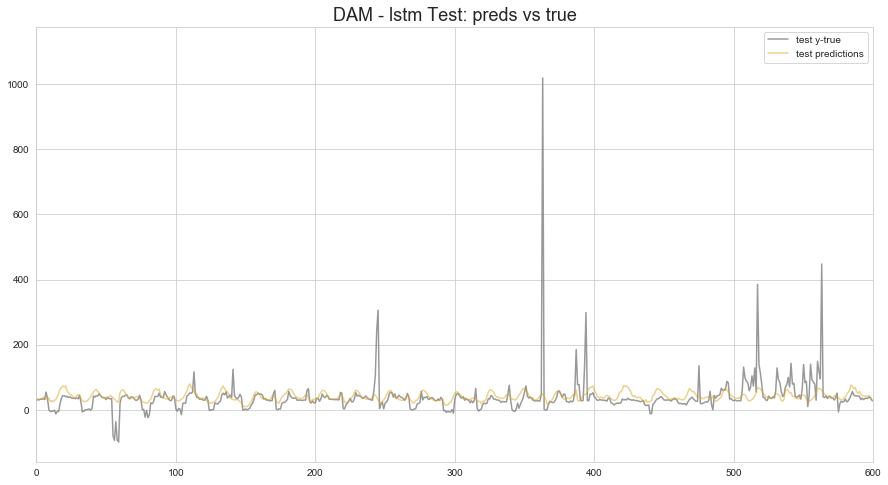

In [187]:

plt.figure(figsize=(15,8))

plt.plot(Y_true,
         label='test y-true',
         alpha = 0.8,
         color='grey')
plt.plot(predictions,
         label='test predictions',
         alpha = 0.5,
         color='goldenrod')
plt.legend()
plt.xlim(0, 600)
plt.title('DAM - lstm Test: preds vs true', fontsize=18)
# plt.savefig('../images/dam_RNN_12_test_pred_vs_true_zoomed.jpg', bbox_inches='tight')
plt.show();

In [189]:
print(predictions)

[[33.27278484]
 [31.64089984]
 [32.06444059]
 ...
 [56.18790343]
 [50.64486838]
 [46.50641969]]
